In [1]:
# Code to Fig. S1 of Sauthoff and others, 2024
# This code run continental-scale operations on multiple datasets and
# requires a 64 GB server or local memory
#
# Written 2023-11-11 by W. Sauthoff (wsauthoff.github.io)

In [43]:
# Import libraries
import datetime
# import earthaccess
# import geopandas as gpd
# from IPython.display import clear_output
import matplotlib
# import matplotlib.cm as cm
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
import matplotlib.dates as mdates
# from matplotlib.patches import Rectangle
# from matplotlib.legend_handler import HandlerTuple
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# import numpy as np
import os
# from os import path
# from pyproj import CRS, Transformer
import rioxarray
# from rioxarray.exceptions import NoDataInBounds
# from shapely.geometry import box, Polygon
# from shapely.ops import unary_union
# from skimage import measure
# import xarray as xr

# from IPython.display import Audio, display
# def play_sound():
#     display(Audio(url="http://codeskulptor-demos.commondatastorage.googleapis.com/pang/pop.mp3", autoplay=True))

# Define data directories dependent on home environment
# Replace with your directory file paths
if os.getenv('HOME') == '/home/jovyan':
    DATA_DIR = '/home/jovyan/data'
    SCRIPT_DIR = '/home/jovyan/repos_my/script_dir'
    OUTPUT_DIR = '/home/jovyan/1_outlines_candidates/output/Fig2_lake_reexamination.ipynb'

# # Define constants and coordinate transforms for the geodesic area calculation
# CRS_LL = "EPSG:4326" # wgs84 in lon,lat
# GEOD = CRS(CRS_LL).get_geod() # geod object for calculating geodesic area on defined ellipsoid
# CRS_XY = "EPSG:3031" # Antarctic Polar Stereographic in x, y
# XY_TO_LL = Transformer.from_crs(CRS_XY, CRS_LL, always_xy = True) # make coord transformer

# # Change default font to increase font size
# plt.rcParams.update({'font.size': 8})

# Functions

In [41]:
def timestamp_to_fractional_year(timestamp):
    # Check if the year is a leap year
    year = timestamp.year
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        days_in_year = 366
    else:
        days_in_year = 365

    # Calculate the day of the year
    day_of_year = timestamp.timetuple().tm_yday

    # Calculate the fractional year
    fractional_year = year + (day_of_year - 1) / days_in_year
    
    return fractional_year

# # Example usage
# timestamp = pd.Timestamp('2023-03-07 12:34:56')
# fractional_year = timestamp_to_fractional_year(timestamp)
# print(f"Fractional Year: {fractional_year}")

# Import datasets

In [2]:
# Import subglacial lake outlines 
exec(open('0_lake_locations.py').read())

Smith and others, 2009, J. Glac., doi:10.3189/002214309789470879
97
Fricker & Scambos, 2009, J. Glac., doi:10.3189/002214309788608813
7
McMillan and others, 2013, GRL, doi:10.1002/grl.50689
1
Kim and others, 2016, TC, doi:10.5194/tc-10-2971-2016
3
Carter and others, 2013, J. Glac., doi:10.3189/2013JoG13J085
1
Fricker and others, 2010, J. Glac., doi:10.3189/002214310791968557
8
Fricker and others, 2014, J. Glac., doi:10.3189/2014JoG14J063
9
Siegfried & Fricker, 2018, Ann. Glac., doi:10.1017/aog.2017.36
1
Smith and others, 2017, TC, doi:10.5194/tc-11-451-2017
4
Gray et al. (2005); Smith et al. (2009)
2
Wingham et al. (2006); Surveyed by ICECAP in 2008/09 (Wright et al., 2012)
1
Wingham et al. (2006)
4
Fricker et al. (2007), Blankenship et al. (2009), Siegfried et al., (2014), Siegfried & Fricker (2018)
1
Fricker et al. (2007); Siegfried et al. (2014); Siegfried & Fricker (2018)
1
Lake Engelhardt (Fricker et al., 2007); Carter et al., (2013); Siegfried & Fricker (2018)
1
Fricker et al. (2

In [3]:
# Import MODIS Mosaic of Antarctica (MOA) surface imagery
# https://nsidc.org/data/nsidc-0730/versions/1
# Relocate to data_dir
# Open into an xarray.DataArray
# moa_lowres = DATA_DIR + '/surface_imagery/MODIS_MOA/2014/moa750_2014_hp1_v01.tif' 
# moa_lowres_da = rioxarray.open_rasterio(moa_lowres)

moa_highres = DATA_DIR + '/surface_imagery/MODIS_MOA/2014/moa125_2014_hp1_v01.tif' 
moa_highres_da = rioxarray.open_rasterio(moa_highres)

Warning 1: TIFFReadDirectory:Invalid data type for tag StripByteCounts
Warning 1: TIFFFetchNormalTag:Incorrect value for "GeoKeyDirectory"; tag ignored
Warning 1: TIFFFetchNormalTag:ASCII value for tag "GeoASCIIParams" contains null byte in value; value incorrectly truncated during reading due to implementation limitations


In [4]:
cyc_dates = pd.read_csv('output/cycle_dates.csv', parse_dates=['cyc_start_dates', 'midcyc_dates', 'cyc_end_dates'])

# Fig. 2

/tmp/ipykernel_244/829708087.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outlines_gdf = evolving_outlines_gdf.append({'geometry': S09_lake_gdf.geometry.values[0]}, ignore_index=True)
/tmp/ipykernel_244/829708087.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_outlines_gdf = all_outlines_gdf.append({'geometry': SF18_lake_gdf.geometry.values[0]}, ignore_index=True)
/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/plotting.py:409: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/plotting.py:409: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/

ValueError: x and y must be the same size

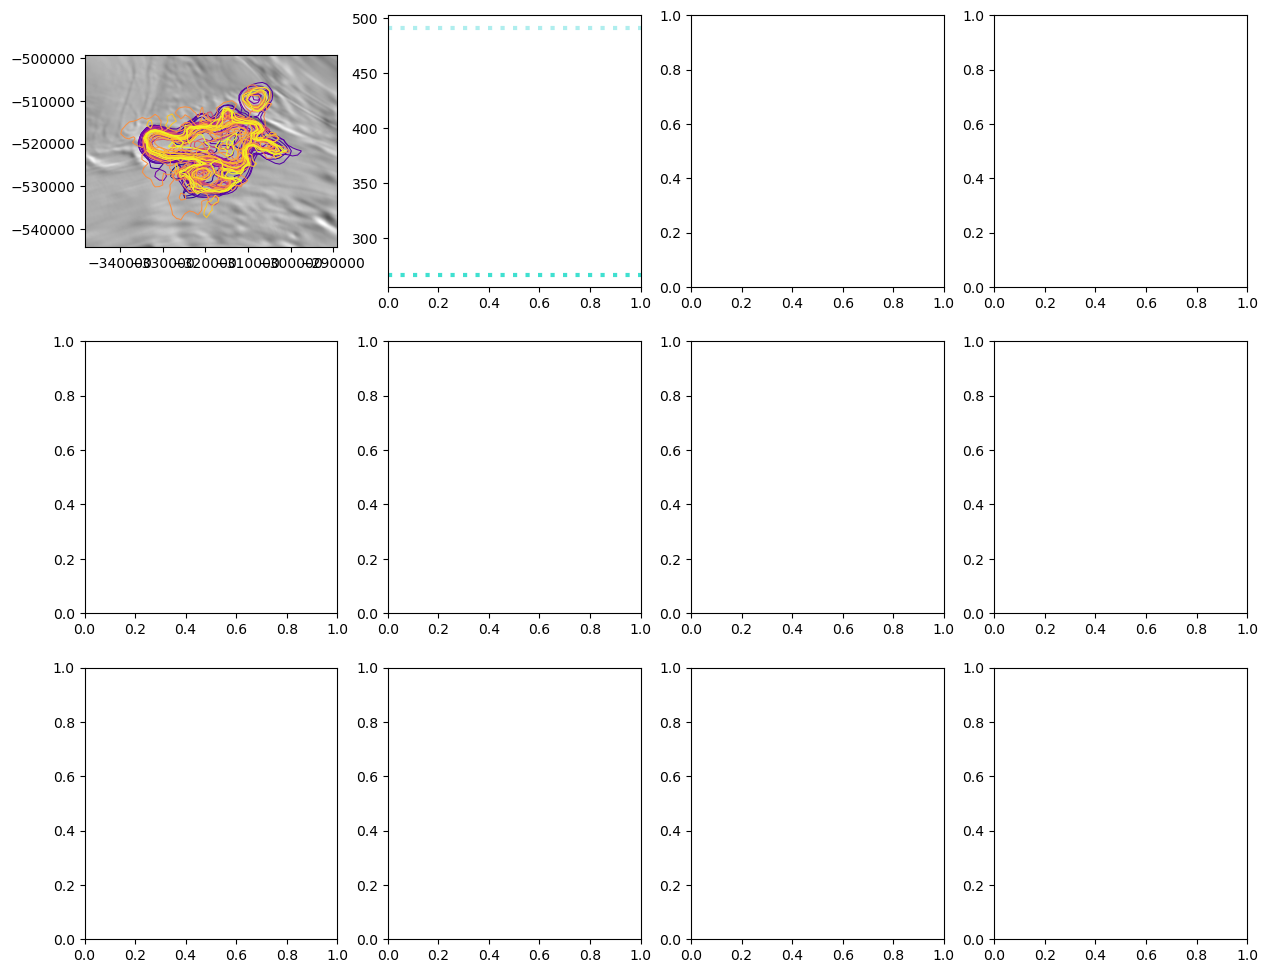

In [61]:
fig, ax = plt.subplots(3,4, figsize=(15,12))

# Define colors and linestyles that will be reused and create lines for legend
S09_color = 'paleturquoise'
SF18_color  = 'turquoise'
lake_locations_notSF18_color = 'darkturquoise'
S09_linestyle=(0, (1, 2))
SF18_linestyle=(0, (1, 1))
S09 = plt.Line2D((0, 1), (0, 0), color=S09_color, linestyle=S09_linestyle, linewidth=2)
SiegfriedFricker2018 = plt.Line2D((0, 1), (0, 0), color=SF18_color, linestyle=SF18_linestyle, linewidth=2)

# Panel - evolving outlines

# Plot static and evolving outlines onto MOA surface imagery
# Subset dataset to region of interest for plotting
S09_lake_gdf = S09_outlines[S09_outlines['Name'] == 'Whillans_4']
SF18_lake_gdf = SF18_outlines[SF18_outlines['name'] == 'ConwaySubglacialLake']
evolving_outlines_gdf = gpd.read_file('outlines/evolving_outlines/{}.geojson'.format(SF18_lake_gdf['name'].values[0]))
geom_calcs_df = pd.read_csv('outlines/compare_evolving_static_outlines/{}.csv'.format(SF18_lake_gdf['name'].values[0]))

# Combine static outline(s) with evolving outlines in unary union to plot all within bounds of plot
# Append static outline(s) to the GeoDataFrame
all_outlines_gdf = evolving_outlines_gdf.append({'geometry': S09_lake_gdf.geometry.values[0]}, ignore_index=True)
all_outlines_gdf = all_outlines_gdf.append({'geometry': SF18_lake_gdf.geometry.values[0]}, ignore_index=True)
# Perform a unary union to combine all polygons into a single geometry
all_outlines_unary_union = all_outlines_gdf.unary_union

x_min, y_min, x_max, y_max = all_outlines_unary_union.bounds
buffer_frac = 0.2
x_buffer = abs(x_max-x_min)*buffer_frac
y_buffer = abs(y_max-y_min)*buffer_frac
mask_x = (moa_highres_da.x >= x_min-x_buffer) & (moa_highres_da.x <= x_max+x_buffer)
mask_y = (moa_highres_da.y >= y_min-y_buffer) & (moa_highres_da.y <= y_max+y_buffer)
moa_highres_da_subset = moa_highres_da.where(mask_x & mask_y, drop=True)
ax[0,0].imshow(moa_highres_da_subset[0,:,:], cmap="gray", clim=[14000, 17000], extent=[x_min-x_buffer, x_max+x_buffer, y_min-y_buffer, y_max+y_buffer])

# Pick colormap and make continuous cmap discrete for evolving outlines
colormap = 'plasma'
continuous_cmap = matplotlib.colormaps[colormap]
discrete_cmap = colors.ListedColormap(continuous_cmap(np.linspace(0, 1, len(cyc_dates['midcyc_dates'])-1)))

# Norm to time variable
norm = plt.Normalize(mdates.date2num(cyc_dates['midcyc_dates'].iloc[0]), 
                     mdates.date2num(cyc_dates['midcyc_dates'].iloc[-1]))

# Use for loop to store each time slice as line segment to use in legend
# And plot each outline in the geopandas geodataframe and color by date
lines = []  # list of lines to be used for the legend
for idx, dt in enumerate(cyc_dates['midcyc_dates'], 0):
    x = 1; y = 1
    line, = ax[0,0].plot(x, y, color=discrete_cmap(norm(mdates.date2num(cyc_dates['midcyc_dates'][idx]))), linewidth=3)
    lines.append(line)
    
    # Filter rows that match the current time slice
    evolving_outlines_gdf_dt_sub = evolving_outlines_gdf[evolving_outlines_gdf['midcyc_datetime'] == dt]

    # Plotting the subset
    evolving_outlines_gdf_dt_sub.boundary.plot(ax=ax[0,0], color=discrete_cmap(norm(mdates.date2num(cyc_dates['midcyc_dates'][idx]))), linewidth=0.75)

# Set axes limit
ax[0,0].set(xlim=(x_min-x_buffer, x_max+x_buffer), ylim=(y_min-y_buffer, y_max+y_buffer))

# Panel - da/dt
ax[0,1].axhline(np.divide(S09_lake_gdf['area (m^2)'], 1e6).values, color=S09_color, linestyle=(0, (1, 2)), linewidth=3)
ax[0,1].axhline(np.divide(SF18_lake_gdf['area (m^2)'], 1e6).values, color=SF18_color, linestyle=(0, (1, 2)), linewidth=3)

# Group by the 'date' column and sum the 'area' column
grouped_data = list(evolving_outlines_gdf.groupby('midcyc_datetime')['area (m^2)'].sum())
grouped_data_dates = list(pd.unique(evolving_outlines_gdf['midcyc_datetime']))

# Plot multi-colored line
x=[timestamp_to_fractional_year(date) for date in cyc_dates['midcyc_dates']]
y=np.divide(grouped_data, 1e6)
# ax[0,1].plot(x,y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm'ed 
norm = plt.Normalize(np.min(x), np.max(x))  # Normalize to map data points to colors
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle=(0,(1,1)))
# Set the values used for colormapping
lc.set_array(x)
lc.set_linewidth(2)
line = ax[0,1].add_collection(lc)
ax[0,1].scatter(x, y, c=x, cmap=colormap)

# locator = mdates.AutoDateLocator(minticks=1, maxticks=7)
# formatter = mdates.ConciseDateFormatter(locator)
# ax[0,1].xaxis.set_major_locator(locator)
# ax[0,1].xaxis.set_major_formatter(formatter)
# # min_area = min(np.divide(sum(lake_S09.area), 1e6), 
# #     # np.divide(sum(lake_SF18.area), 1e6), 
# #     min(np.divide(areas_var, 1e6)))
# # max_area = max(np.divide(sum(lake_S09.area), 1e6), 
# #     # np.divide(sum(lake_SF18.area), 1e6), 
# #     max(np.divide(areas_var,1e6)))


# ax[0,1].set(xlim=(midcyc_dates[0], midcyc_dates[-1]),
#            # ylim=((min_area - (max_area - min_area)*0.1), 
#            #       (max_area + (max_area - min_area)*0.1))
#           )
ax[0,1].set_title('wetted area [km$^2$]', size=17.5, labelpad=8)
# ax[0,1].set_yticks(np.arange(0, 150, 25))



# # Panel C - dh/dt
# ax[0,2].axhline(0, color='k', linestyle='solid', linewidth=1)
# # ax[2].axhline(np.divide(ROI['area (m^2)'], 1e6).values, color=S09_color, linestyle=(0, (1, 2)), linewidth=3)

# # Plot static outline time series
# ax[0,2].plot(midcyc_dates, np.cumsum(lkavgdhdt_S09), color=S09_color, linestyle=(0, (1, 2)), linewidth=3)

# # Group by the 'date' column and sum the 'area'
# grouped_data = list(gdf_subset.groupby('datetime')['dh (m)'].sum())
# grouped_data_dates = list(pd.unique(gdf_subset['datetime']))

# # Plot multi-colored line
# cmap_str='plasma'
# x=mdates.date2num(grouped_data_dates)
# y=np.cumsum(grouped_data)
# points = np.array([x, y]).T.reshape(-1, 1, 2)
# segments = np.concatenate([points[:-1], points[1:]], axis=1)
# # Create a continuous norm to map from data points to colors
# norm = plt.Normalize(x.min(), x.max())
# lc = LineCollection(segments, cmap=cmap_str, norm=norm, linestyle=(0,(1,1)))
# # Set the values used for colormapping
# lc.set_array(x)
# lc.set_linewidth(2)
# line = ax[0,2].add_collection(lc)

# locator = mdates.AutoDateLocator(minticks=1, maxticks=7)
# formatter = mdates.ConciseDateFormatter(locator)
# ax[0,2].xaxis.set_major_locator(locator)
# ax[0,2].xaxis.set_major_formatter(formatter)
# # min_area = min(np.divide(sum(lake_S09.area), 1e6), 
# #     # np.divide(sum(lake_SF18.area), 1e6), 
# #     min(np.divide(areas_var, 1e6)))
# # max_area = max(np.divide(sum(lake_S09.area), 1e6), 
# #     # np.divide(sum(lake_SF18.area), 1e6), 
# #     max(np.divide(areas_var,1e6)))

# ax[0,2].scatter(x, y, c=x, cmap=cmap_str)

# ax[0,2].set(xlim=(midcyc_dates[0], midcyc_dates[-1]),
#            # ylim=((min_area - (max_area - min_area)*0.1), 
#            #       (max_area + (max_area - min_area)*0.1))
#           )
# ax[0,2].set_ylabel('cumulative\nheight change [m]', size=17.5, labelpad=8)
# # ax[2].set_yticks(np.arange(0, 150, 25))



# # Panel D - dv/dt
# ax[0,3].axhline(0, color='k', linestyle='solid', linewidth=1)
# # ax[2].axhline(np.divide(ROI['area (m^2)'], 1e6).values, color=S09_color, linestyle=(0, (1, 2)), linewidth=3)

# # Plot static outline time series
# ax[0,3].plot(midcyc_dates, np.divide(np.cumsum(vols_S09), 1e+9), color=S09_color, linestyle=(0, (1, 2)), linewidth=3)

# # Group by the 'date' column and sum the 'area'
# grouped_data = list(gdf_subset.groupby('datetime')['vol (m^3)'].sum())
# grouped_data_dates = list(pd.unique(gdf_subset['datetime']))

# # Calc bias and plot
# S09_S24_bias = [a_i - b_i for a_i, b_i in zip(np.cumsum(grouped_data), np.cumsum(vols_S09))]
# ax[0,3].plot(grouped_data_dates, np.divide(S09_S24_bias, 1e+9), color='red', linestyle='solid', linewidth=2)

# # Plot multi-colored line
# x=mdates.date2num(grouped_data_dates)
# y=np.divide(np.cumsum(grouped_data), 1e9)
# points = np.array([x, y]).T.reshape(-1, 1, 2)
# segments = np.concatenate([points[:-1], points[1:]], axis=1)
# # Create a continuous norm to map from data points to colors
# norm = plt.Normalize(x.min(), x.max())
# lc = LineCollection(segments, cmap=cmap_str, norm=norm, linestyle=(0,(1,1)))
# # Set the values used for colormapping
# lc.set_array(x)
# lc.set_linewidth(2)
# line = ax[0,3].add_collection(lc)









# Plot static and evolving outlines onto MOA surface imagery
# Subset dataset to region of interest for plotting
# lake_gdf = SiegfriedFricker2018_outlines[SiegfriedFricker2018_outlines['name'] == 'Whillans_7']
SF18_lake_gdf = SF18_outlines[SF18_outlines['name'] == 'Foundation_5']
evolving_outlines_gdf = gpd.read_file('outlines/evolving_outlines/{}.geojson'.format(SF18_lake_gdf['name'].values[0]))
geom_calcs_df = pd.read_csv('outlines/compare_evolving_static_outlines/{}.csv'.format(SF18_lake_gdf['name'].values[0]))

# Combine static outline(s) with evolving outlines in unary union to plot all within bounds of plot
# Append static outline(s) to the GeoDataFrame
all_outlines_gdf = evolving_outlines_gdf.append({'geometry': SF18_lake_gdf.geometry.values[0]}, ignore_index=True)
# Perform a unary union to combine all polygons into a single geometry
all_outlines_unary_union = all_outlines_gdf.unary_union

x_min, y_min, x_max, y_max = all_outlines_unary_union.bounds
buffer_frac = 0.2
x_buffer = abs(x_max-x_min)*buffer_frac
y_buffer = abs(y_max-y_min)*buffer_frac
mask_x = (moa_highres_da.x >= x_min-x_buffer) & (moa_highres_da.x <= x_max+x_buffer)
mask_y = (moa_highres_da.y >= y_min-y_buffer) & (moa_highres_da.y <= y_max+y_buffer)
moa_highres_da_subset = moa_highres_da.where(mask_x & mask_y, drop=True)
ax[1,0].imshow(moa_highres_da_subset[0,:,:], cmap="gray", clim=[14000, 17000], extent=[x_min-x_buffer, x_max+x_buffer, y_min-y_buffer, y_max+y_buffer])

# Use for loop to plot each outline in the geopandas geodataframe and color by date
for idx, dt in enumerate(cyc_dates['midcyc_dates'], 0):
    # Filter rows that match the current time slice
    evolving_outlines_gdf_dt_sub = evolving_outlines_gdf[evolving_outlines_gdf['midcyc_datetime'] == dt]

    # Plotting the subset
    evolving_outlines_gdf_dt_sub.boundary.plot(ax=ax[1,0], color=discrete_cmap(norm(mdates.date2num(cyc_dates['midcyc_dates'][idx]))), linewidth=0.75)

# Set axes limit
ax[1,0].set(xlim=(x_min-x_buffer, x_max+x_buffer), ylim=(y_min-y_buffer, y_max+y_buffer))




# Plot static and evolving outlines onto MOA surface imagery
# Subset dataset to region of interest for plotting
S09_lake_gdf = S09_outlines[S09_outlines['Name'].isin(['Slessor_2', 'Slessor_3'])]
SF18_lake_gdf = SF18_outlines[SF18_outlines['name'] == 'Slessor_23']
evolving_outlines_gdf = gpd.read_file('outlines/evolving_outlines/{}.geojson'.format(SF18_lake_gdf['name'].values[0]))
geom_calcs_df = pd.read_csv('outlines/compare_evolving_static_outlines/{}.csv'.format(SF18_lake_gdf['name'].values[0]))

# Combine static outline(s) with evolving outlines in unary union to plot all within bounds of plot
# Append static outline(s) to the GeoDataFrame
all_outlines_gdf = evolving_outlines_gdf.append({'geometry': S09_lake_gdf.geometry.values[0]}, ignore_index=True)
all_outlines_gdf = all_outlines_gdf.append({'geometry': S09_lake_gdf.geometry.values[1]}, ignore_index=True)
all_outlines_gdf = all_outlines_gdf.append({'geometry': SF18_lake_gdf.geometry.values[0]}, ignore_index=True)
# Perform a unary union to combine all polygons into a single geometry
all_outlines_unary_union = all_outlines_gdf.unary_union

x_min, y_min, x_max, y_max = all_outlines_unary_union.bounds
buffer_frac = 0.3
x_buffer = abs(x_max-x_min)*buffer_frac
y_buffer = abs(y_max-y_min)*buffer_frac
mask_x = (moa_highres_da.x >= x_min-x_buffer) & (moa_highres_da.x <= x_max+x_buffer)
mask_y = (moa_highres_da.y >= y_min-y_buffer) & (moa_highres_da.y <= y_max+y_buffer)
moa_highres_da_subset = moa_highres_da.where(mask_x & mask_y, drop=True)
ax[2,0].imshow(moa_highres_da_subset[0,:,:], cmap="gray", clim=[14000, 17000], extent=[x_min-x_buffer, x_max+x_buffer, y_min-y_buffer, y_max+y_buffer])

# Use for loop to plot each outline in the geopandas geodataframe and color by date
for idx, dt in enumerate(cyc_dates['midcyc_dates']):
    # Filter rows that match the current time slice
    evolving_outlines_gdf_dt_sub = evolving_outlines_gdf[evolving_outlines_gdf['midcyc_datetime'] == dt]

    # Plotting the subset
    # outlines_gdf_dt_sub.boundary.plot(ax=ax[2,0], color=discrete_cmap(norm(mdates.date2num(cyc_dates['midcyc_dates'][idx]))), linewidth=0.75)
    evolving_outlines_gdf_dt_sub.geometry.centroid.plot(ax=ax[2,0], color=discrete_cmap(norm(mdates.date2num(cyc_dates['midcyc_dates'][idx]))), linewidth=1, marker='+')

# Set axes limit
ax[2,0].set(xlim=(x_min-x_buffer, x_max+x_buffer), ylim=(y_min-y_buffer, y_max+y_buffer))











# for i in ax: 
#     S09_outlines.boundary.plot(ax=i, edgecolor=S09_color, facecolor='none', linestyle=(0, (1, 2)), linewidth=3, alpha=1, zorder=0)
#     SiegfriedFricker2018_SF18outlines.boundary.plot(ax=i, edgecolor=SF18_color, facecolor='none', linestyle=(0, (1, 1)), linewidth=3, alpha=1, zorder=0)

# # Plot inset map
# axIns = ax.inset_axes([0.01, 0.01, 0.3, 0.3]) # [left, bottom, width, height] (fractional axes coordinates)
# axIns.set_aspect('equal')
# moa_2014_coastline.plot(ax=axIns, color='gray', edgecolor='k', linewidth=0.1, zorder=3)
# moa_2014_groundingline.plot(ax=axIns, color='ghostwhite', edgecolor='k', linewidth=0.1, zorder=3)
# axIns.axis('off')

# # Plot black rectangle to indicate location
# rect = Rectangle((x_min, y_min), (x_max-x_min), (y_max-y_min), fill=False, linewidth=2, color='k', zorder=3)
# axIns.add_artist(rect)

# Label axes
ax[2,0].set_xlabel('x [km]', size=16)
ax[1,0].set_ylabel('y [km]', size=16)

# Create colorbar 
m = plt.cm.ScalarMappable(cmap=discrete_cmap)
m.set_array(np.array([timestamp_to_fractional_year(date) for date in cyc_dates['midcyc_dates']]))
cax = inset_axes(ax[2,0],
                 width="100%",
                 height="3%",
                 loc=3,
                 bbox_to_anchor=[0,-0.3,1,1],
                 bbox_transform=ax[2,0].transAxes,
                 borderpad=0,
                 )
cbar=fig.colorbar(m, ticks=np.array([2010,2012,2014,2016,2018,2020,2022]), 
             cax=cax, orientation='horizontal').set_label('evolving outline year', size=15)

for subplot in [ax[0,0], ax[1,0], ax[2,0]]:
    # Plot previous static outline inventories
    S09_outlines.boundary.plot(ax=subplot, edgecolor=S09_color, facecolor='none', linestyle=S09_linestyle, linewidth=3, alpha=1, zorder=0)
    SF18_outlines_SF18only.boundary.plot(ax=subplot, edgecolor=SF18_color, facecolor='none', linestyle=SF18_linestyle, linewidth=3, alpha=1, zorder=0)
    
    # Change polar stereographic m to km
    km_scale = 1e3
    ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/km_scale))
    subplot.xaxis.set_major_formatter(ticks_x)
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/km_scale))
    subplot.yaxis.set_major_formatter(ticks_y)
    
plt.show()